#  递归与分形图

## Koch曲线

瑞典数学家Helge von Koch，在1904年发表的“从初等几何构造的一条没有切线的连续曲线”的论文中提出Korch曲线。它的描述如下：

* 指定一条线段的长度l（可以理解为第0次迭代）
* 将这条线段三等分，并以中间的线段为底边构造一个等边三角形，然后去掉底边
* 对2中生成的曲线的每一条边重复2的操作（每操作一次称为一次迭代）

最终得到的集合图形长度为：
${{L=l∗(\frac{4}{3})^N}}$

其中的N指的是迭代次数。

**绘制方法：**
* 如果N=0，直接画出L长的直线即可
* 如果N=1（第一次迭代），画出长度为L/3的线段；画笔向左转60度再画长度为L/3长的线段；画笔向右转120度画长度为L/3长的线段；画笔再向左转60度画出长度为L/3的线段

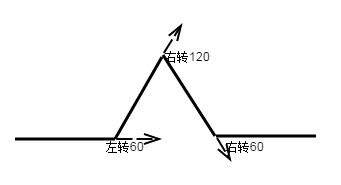

* 如果n>1，第n次迭代相当于：n-1次迭代；画笔左转60度；n-1次迭代；画笔右转120度；n-1次迭代；画笔左转60度；n-1次迭代。


In [ ]:
# -*- coding: utf-8 -*-
import turtle

Division = 3.0 
DirectionAangle = [('left',60),('right',120),('left',60)]

def call(name):
    if name == 'left':
        return turtle.left
    else:
        return turtle.right

def koch(n, length):
    if n==0:
        turtle.forward(length)   
    else:
        for DA in DirectionAangle:
            koch(n-1,length/Division)
            call(DA[0])(DA[1])
        koch(n-1,length/Division)   

koch(n=2, length=100)
turtle.done()   

## 递归

以上代码中，我们看到函数koch()调用了它自身。在数学与计算机科学中，函数的定义中使用函数自身的方法被称为递归（英語：Recursion），又译为递回。递归一词还较常用于描述以自相似方法重复事物的过程。 例如，当两面镜子相互之间近似平行时，镜中嵌套的图像是以无限递归的形式出现的。 也可以理解为自我复制的过程。

在数理逻辑和计算机科学中经常使用递归的方法定义某些对象。譬如对于自然数一个递归定义：
* 1、0是一个自然数
* 2、比一个自然数大1的也是自然数
* 3、除1、2外没有自然数

以下是关于树的递归定义：
* 1、单个节点是一棵树
* 2、用一个节点将两个树连接后也是一棵树
* 除1、2外没有树


递归算法是一种直接或者间接调用自身函数或者方法的算法。递归算法的实质是把问题分解成规模缩小的同类问题的子问题，然后递归调用方法来表示问题的解。
递归算法对解决一大类问题很有效，它可以使算法简洁和易于理解。它表现在一段程序中往往会遇到调用自身的那样一种coding策略，这样我们就可以利用大道至简的思想，把一个大的复杂的问题层层转换为一个小的和原问题相似的问题来求解的这样一种策略。递归往往能给我们带来非常简洁非常直观的代码形势，从而使我们的编码大大简化，然而递归的思维确实很我们的常规思维相逆的，我们通常都是从上而下的思维问题， 而递归趋势从下往上的进行思维。这样我们就能看到我们会用很少的语句解决了非常大的问题，所以递归策略的最主要体现就是小的代码量解决了非常复杂的问题。

递归算法解决问题的特点：
* 递归就是方法里调用自身。
* 在使用递增归策略时，必须有一个明确的递归结束条件，称为递归出口。
* 递归算法解题通常显得很简洁，但递归算法解题的运行效率较低。所以一般不提倡用递归算法设计程序。
在递归调用的过程当中系统为每一层的返回点、局部量等开辟了栈来存储。递归次数过多容易造成栈溢出等，所以一般不提倡用递归算法设计程序。
　　递归算法要求。递归算法所体现的“重复”一般有三个要求：

　　(1) 是每次调用在规模上都有所缩小（通常是减半）；
　　(2) 是相邻两次重复之间有紧密的联系，前一次要为后一次做准备（通常前一次的输出就作为后一次的输入）；
　　(3) 是在问题的规模极小时必须用直接给出解答而不再进行递归调用，因而每次递归调用都是有条件的(以规模未达到直接解答的大小为条件)，无条件递归调用将会成为死循环而不能正常结束。


## 曼德勃罗集

time= 0.14487399999999995
time= 0.249193
time= 0.2798940000000001
time= 0.3021980000000002
time= 0.4829789999999998
time= 0.6162699999999997


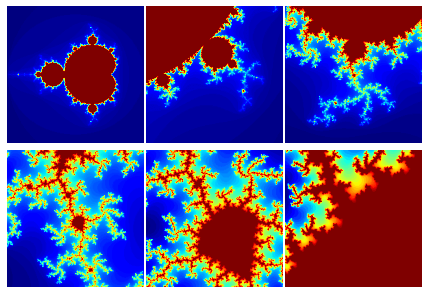

In [3]:
import numpy
import matplotlib.pyplot as plt
import time
from matplotlib import cm

def iter_point(c):
    z = c
    for i in range(1, 100): # 最多迭代100次
        if abs(z)>2:
            break # 半径大于2则认为逃逸
        z = z*z+c
    return i # 返回迭代次数

def draw_mandelbrot(cx, cy, d):
    """
    绘制点(cx, cy)附近正负d的范围的Mandelbrot
    """
    x0, x1, y0, y1 = cx-d, cx+d, cy-d, cy+d 
    y, x = numpy.ogrid[y0:y1:200j, x0:x1:200j]
    c = x + y*1j
    start = time.clock()
    mandelbrot = numpy.frompyfunc(iter_point,1,1)(c).astype(numpy.float)
    print("time=",time.clock() - start)
    plt.imshow(mandelbrot, cmap=cm.jet, extent=[x0,x1,y0,y1])
    plt.gca().set_axis_off()

x,y = 0.27322626, 0.595153338

plt.subplot(231)
draw_mandelbrot(-0.5,0,1.5)
for i in range(2,7):    
    plt.subplot(230+i)
    draw_mandelbrot(x, y, 0.2**(i-1))
plt.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)
plt.show()

## 分形树叶

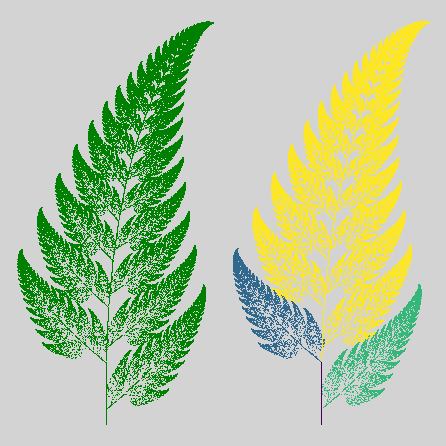

In [6]:
import numpy
import matplotlib.pyplot as plt
import time

# 蕨类植物叶子的迭代函数和其概率值
eq1 = numpy.array([[0,0,0],[0,0.16,0]])
p1 = 0.01

eq2 = numpy.array([[0.2,-0.26,0],[0.23,0.22,1.6]])
p2 = 0.07

eq3 = numpy.array([[-0.15, 0.28, 0],[0.26,0.24,0.44]])
p3 = 0.07

eq4 = numpy.array([[0.85, 0.04, 0],[-0.04, 0.85, 1.6]])
p4 = 0.85

def ifs(p, eq, init, n):
    """
    进行函数迭代
    p: 每个函数的选择概率列表
    eq: 迭代函数列表
    init: 迭代初始点
    n: 迭代次数

    返回值： 每次迭代所得的X坐标数组， Y坐标数组， 计算所用的函数下标    
    """

    # 迭代向量的初始化
    pos = numpy.ones(3, dtype=numpy.float)
    pos[:2] = init

    # 通过函数概率，计算函数的选择序列
    p = numpy.add.accumulate(p)    
    rands = numpy.random.rand(n)
    select = numpy.ones(n, dtype=numpy.int)*(n-1)
    for i, x in enumerate(p[::-1]):
        select[rands<x] = len(p)-i-1

    # 结果的初始化
    result = numpy.zeros((n,2), dtype=numpy.float)
    c = numpy.zeros(n, dtype=numpy.float)

    for i in range(n):
        eqidx = select[i] # 所选的函数下标
        tmp = numpy.dot(eq[eqidx], pos) # 进行迭代
        pos[:2] = tmp # 更新迭代向量

        # 保存结果
        result[i] = tmp
        c[i] = eqidx

    return result[:,0], result[:, 1], c

start = time.clock()
x, y, c = ifs([p1,p2,p3,p4],[eq1,eq2,eq3,eq4], [0,0], 100000)
time.clock() - start
plt.figure(figsize=(6,6))
plt.subplot(121)
plt.scatter(x, y, s=1, c="g", marker="s", linewidths=0)
plt.axis("equal")
plt.axis("off")
plt.subplot(122)
plt.scatter(x, y, s=1,c = c, marker="s", linewidths=0)
plt.axis("equal")
plt.axis("off")
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)
plt.gcf().patch.set_facecolor("#D3D3D3")
plt.show()

## 其它分形图(科赫曲线、分形龙、谢尔宾斯基三角等)

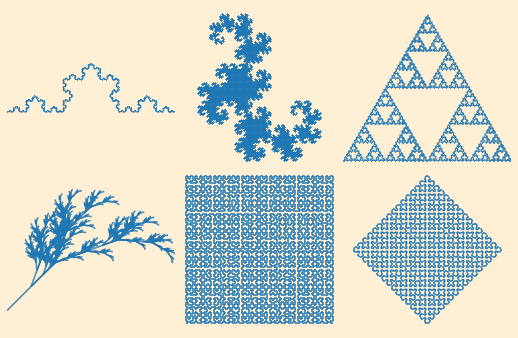

In [25]:
from math import sin, cos, pi
import matplotlib.pyplot as pl
from matplotlib import collections

class L_System(object):
    def __init__(self, rule):
        info = rule['S']
        for i in range(rule['iter']):
            ninfo = []
            for c in info:
                if c in rule:
                    ninfo.append(rule[c])
                else:
                    ninfo.append(c)
                info = "".join(ninfo)
        self.rule = rule
        self.info = info

    def get_lines(self):
        d = self.rule['direct']
        a = self.rule['angle']
        p = (0.0, 0.0)
        l = 1.0
        lines = []
        stack = []
        for c in self.info:
            if c in "Ff":
                r = d * pi / 180
                t = p[0] + l*cos(r), p[1] + l*sin(r)
                lines.append(((p[0], p[1]), (t[0], t[1])))
                p = t
            elif c == "+":
                d += a
            elif c == "-":
                d -= a
            elif c == "[":
                stack.append((p,d))
            elif c == "]":
                p, d = stack[-1]
                del stack[-1]
        return lines

rules = [
    {
    "F":"F+F--F+F", "S":"F",
    "direct":180,
    "angle":60,
    "iter":5,
    "title":"Koch"
    },
    {
    "X":"X+YF+", "Y":"-FX-Y", "S":"FX",
    "direct":0,
    "angle":90,
    "iter":13,
    "title":"Dragon"
    },
    {
    "f":"F-f-F", "F":"f+F+f", "S":"f",
    "direct":0,
    "angle":60,
    "iter":7,
    "title":"Triangle"
    },
    {
    "X":"F-[[X]+X]+F[+FX]-X", "F":"FF", "S":"X",
    "direct":-45,
    "angle":25,
    "iter":6,
    "title":"Plant"
    },
    {
    "S":"X", "X":"-YF+XFX+FY-", "Y":"+XF-YFY-FX+",
    "direct":0,
    "angle":90,
    "iter":6,
    "title":"Hilbert"
    },
    {
    "S":"L--F--L--F", "L":"+R-F-R+", "R":"-L+F+L-",
    "direct":0,
    "angle":45,
    "iter":10,
    "title":"Sierpinski"
    },

]

def draw(ax, rule, iter=None):
    if iter!=None:
        rule["iter"] = iter
    lines = L_System(rule).get_lines()
    linecollections = collections.LineCollection(lines)
    ax.add_collection(linecollections, autolim=True)
    ax.axis("equal")
    ax.set_axis_off()
    ax.set_xlim(ax.dataLim.xmin, ax.dataLim.xmax)
    ax.invert_yaxis()

fig = pl.figure(figsize=(7, 4.5))
fig.patch.set_facecolor("papayawhip")

for i in range(6):
    ax = fig.add_subplot(231+i)
    draw(ax, rules[i])

fig.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)
pl.show()

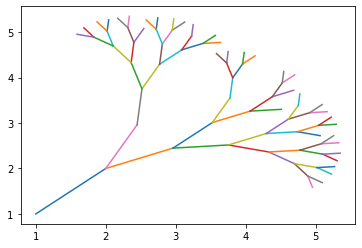

In [27]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
# 距离计算公式
def get_len(x1,x2,y1,y2):
    diff_x = (x1-x2)**2
    diff_y = (y1-y2)**2
    length = np.sqrt(diff_x+diff_y)
    return length
  
# 绕pointx,pointy顺时针旋转
def Srotate(angle,valuex,valuey,pointx,pointy):
    # 将角度转换为弧度
    angle = math.radians(angle)
    valuex = np.array(valuex)
    valuey = np.array(valuey)
    sRotatex = (valuex-pointx)*math.cos(angle) + (valuey-pointy)*math.sin(angle) + pointx
    sRotatey = (valuey-pointy)*math.cos(angle) - (valuex-pointx)*math.sin(angle) + pointy
    sRotatex = sRotatex.tolist()
    sRotatey = sRotatey.tolist()
    sRotate = sRotatex + sRotatey
    sRotate = np.array(sRotate)
    return sRotate
 
# 绕pointx,pointy逆时针旋转
def Nrotate(angle,valuex,valuey,pointx,pointy):
    # 将角度转换为弧度
    angle = math.radians(angle)
    valuex = np.array(valuex)
    valuey = np.array(valuey)
    nRotatex = (valuex-pointx)*math.cos(angle) - (valuey-pointy)*math.sin(angle) + pointx
    nRotatey = (valuex-pointx)*math.sin(angle) + (valuey-pointy)*math.cos(angle) + pointy
    nRotatex = nRotatex.tolist()
    nRotatey = nRotatey.tolist()
    nRotate = nRotatex + nRotatey
    nRotate = np.array(nRotate)
    return nRotate
# 判断两条线段是否相交
def judge(a,b,c,d):
    if min(a[0],b[0])<=max(c[0],d[0]) and min(c[1],d[1])<=max(a[1],b[1]) and min(c[0],d[0])<=max(a[0],b[0]) and min(a[1],b[1])<=max(c[1],d[1]):
        return True
    else:
        return False
 
allBranchs = []
def pltTrees(arr):
  branchLen = get_len(arr[0],arr[1],arr[2],arr[3])
  if branchLen>0.2:
    plt.plot(arr[0:2],arr[2:4])
    arr_next_left = Srotate(20,arr[0:2],arr[2:4],arr[0],arr[2])
    arr_next_left = np.array(arr_next_left)*0.75
    arr_next_left[0:2] = arr_next_left[0:2] - (arr_next_left[0]-arr[1])
    arr_next_left[2:4] = arr_next_left[2:4] - (arr_next_left[2]-arr[3])
    booleanListLeft = []
    for i in range(len(allBranchs)):
      a = [allBranchs[i][0],allBranchs[i][2]]
      b = [allBranchs[i][1],allBranchs[i][3]]
      c = [arr_next_left[0],arr_next_left[2]]
      d = [arr_next_left[1],arr_next_left[3]]
      if a == c or b == d or a == d or b == c:
        continue
      result = judge(a,b,c,d)
      booleanListLeft.append(result)
    if True not in booleanListLeft:
      allBranchs.append(arr_next_left)
      pltTrees(arr_next_left)
    arr_next_right = Nrotate(40,arr_next_left[0:2],arr_next_left[2:4],arr_next_left[0],arr_next_left[2])
    booleanListRight = []
    for i in range(len(allBranchs)):
      a = [allBranchs[i][0],allBranchs[i][2]]
      b = [allBranchs[i][1],allBranchs[i][3]]
      c = [arr_next_right[0],arr_next_right[2]]
      d = [arr_next_right[1],arr_next_right[3]]
      if a == c or b == d or a == d or b == c:
        continue
      result = judge(a,b,c,d)
      booleanListRight.append(result)
    if True not in booleanListRight:
      allBranchs.append(arr_next_right)
      pltTrees(arr_next_right)
    
  
arr = np.array([1,2,1,2])
pltTrees(arr)
plt.show()
